In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/PDS_Assignment_1/Ques_2')


In [5]:
#Reading and storing the data to be analysed in the variable 'data'
data = pd.read_csv('data_clean/clean_data.csv')
data

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


In [19]:
# Mean math score,reading score and writing score test among different parental education level

import plotly.express as px

groupedData = data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
meltedData = pd.melt(groupedData, id_vars='parental level of education', var_name='score type', value_name='score')
fig = px.bar(meltedData, x='parental level of education', y='score', color='score type',
             title="Scores based on Parental Level of Education",
             labels={'parental level of education': 'Parental Education Level', 'score': 'Score'},
             barmode='group')
fig.show()

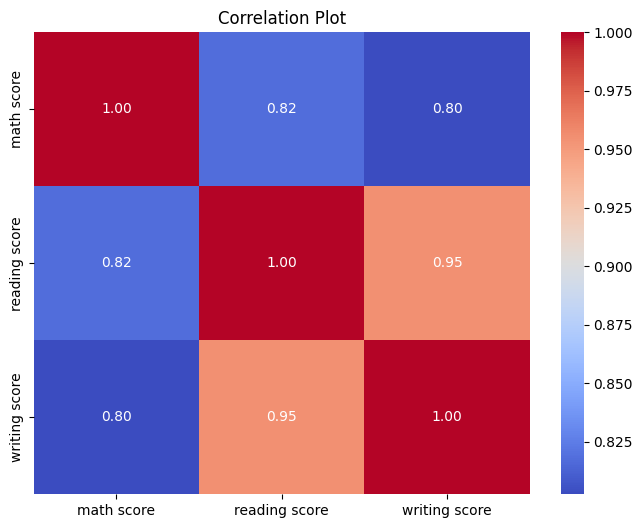

<Figure size 640x480 with 0 Axes>

In [23]:
#Graph showing the correlation between math score, reading score and writing score

import seaborn as sns

correlationMatrix = data[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot")
plt.show()
plt.savefig("/content/drive/MyDrive/PDS_Assignment_1/Ques_2/results/correlation_plot.png")

In [25]:
#Graph describing the percentage of parental level of education based on the gender

aggregatedData = data.groupby(['gender', 'test preparation course']).size().reset_index(name='count')
total_counts = aggregatedData.groupby('gender')['count'].transform('sum')
aggregatedData['percentage'] = (round((aggregatedData['count'] / total_counts) * 100,2))
fig = px.bar(aggregatedData, x='gender', y='percentage', color='test preparation course',
             title="Percentage of Parental Level of Education based on Gender", barmode='group')
fig.update_layout(yaxis_title="Percentage")
fig.show()

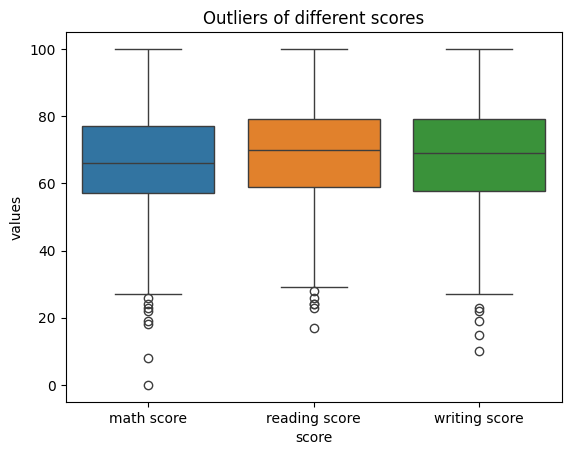

<Figure size 640x480 with 0 Axes>

In [27]:
# Outliers for math score, reading score and writing score
sns.boxplot(data=data[['math score','reading score','writing score']])
plt.xlabel('score')
plt.ylabel('values')
plt.title('Outliers of different scores')
plt.show()
plt.savefig("/content/drive/MyDrive/PDS_Assignment_1/Ques_2/results/Outliers_Scores.png")

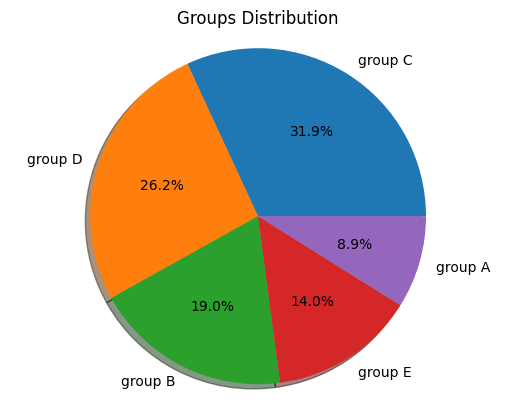

<Figure size 640x480 with 0 Axes>

In [28]:
#Pie chart describing the distribution of various groups
plt.pie(data['race/ethnicity'].value_counts().values,autopct='%1.1f%%',labels=data['race/ethnicity'].value_counts().index,shadow=True)
plt.axis('equal')
plt.title('Groups Distribution')
plt.show()
plt.savefig("/content/drive/MyDrive/PDS_Assignment_1/Ques_2/results/Groups_distribution.png")

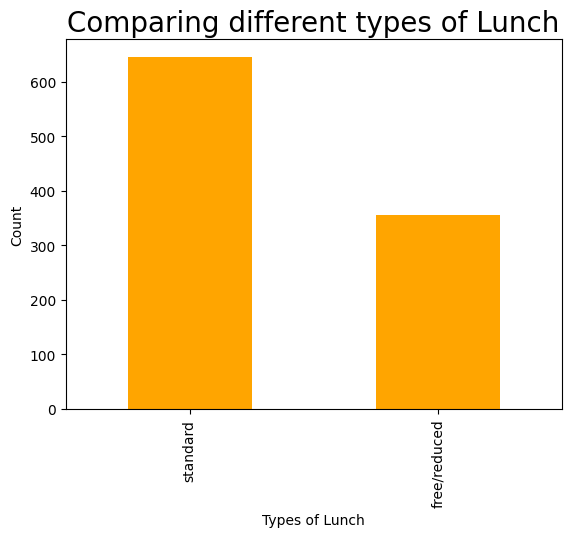

<Figure size 640x480 with 0 Axes>

In [30]:
#The following bar graph shows the most popular lunch among the students

# Creating a bar plot for the count of each type of lunch
data['lunch'].value_counts().plot(kind='bar', color='Orange')

plt.title('Comparing different types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Displaying the plot
plt.show()

plt.savefig("/content/drive/MyDrive/PDS_Assignment_1/Ques_2/results/lunch_comparision.png")